**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 5

### The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. It is one of the popular and simplest classification and regression classifiers used in machine learning today. While the KNN algorithm can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another. For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. While this is technically considered “plurality voting”, the term, “majority vote” is more commonly used in literature. The distinction between these terminologies is that “majority voting” technically requires a majority of greater than 50%, which primarily works when there are only two categories. When you have multiple classes—e.g. four categories, you don’t necessarily need 50% of the vote to make a conclusion about a class

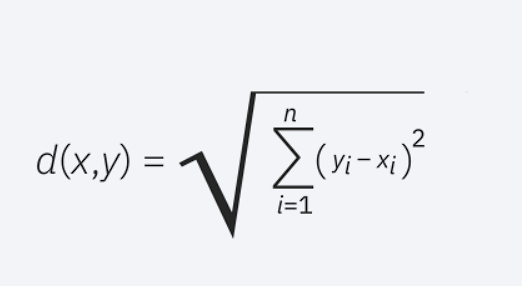
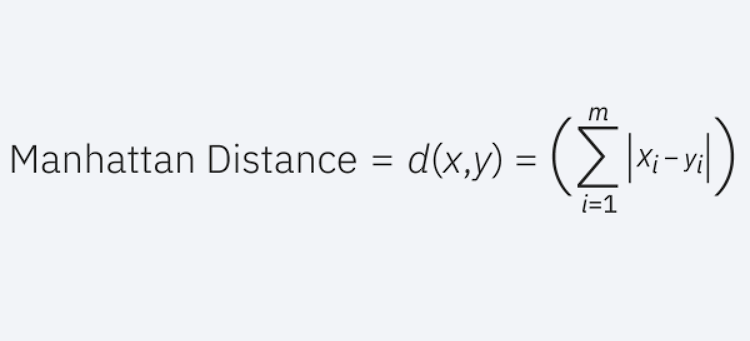
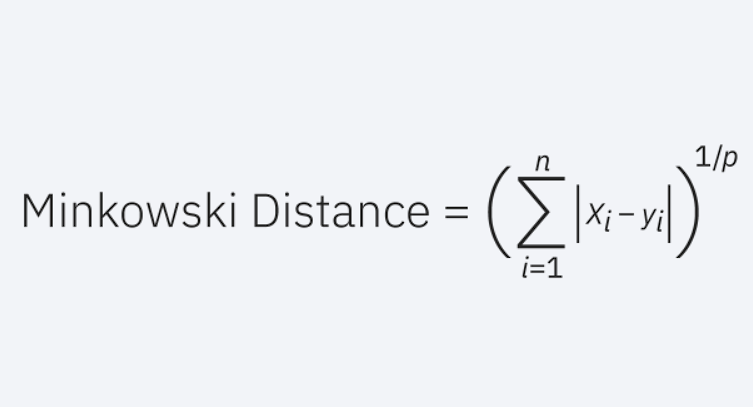
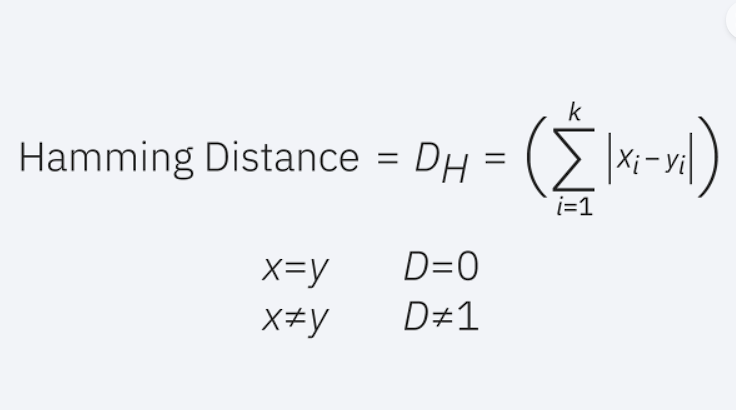

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [422]:
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [424]:
df.drop(columns=['Unnamed: 32','id'],inplace=True)

### Data has no null values

### Encoding target variable

In [425]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [426]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

### Plotting heatmap to check correlation

<Axes: >

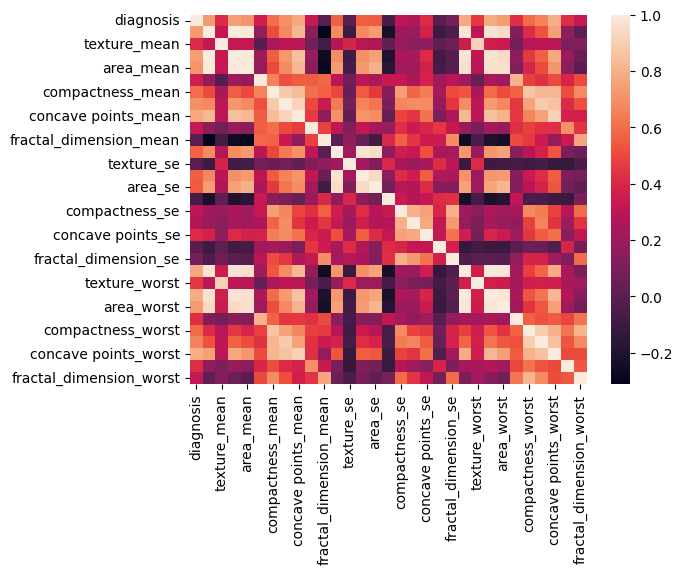

In [427]:
import seaborn as sns
sns.heatmap(df.corr())

### Dropping columns with less than mod(0.2) correlation

In [428]:
diagnosisCorr = df.corr()['diagnosis']

for param in diagnosisCorr.index:
    print("For {} correlation is :{}".format(param,diagnosisCorr[param]))

    if -0.2 < diagnosisCorr[param] < 0.2:
        df.drop(columns=[param], inplace=True)

For diagnosis correlation is :1.0
For radius_mean correlation is :0.7300285113754563
For texture_mean correlation is :0.41518529984520475
For perimeter_mean correlation is :0.7426355297258334
For area_mean correlation is :0.7089838365853902
For smoothness_mean correlation is :0.35855996508593324
For compactness_mean correlation is :0.5965336775082527
For concavity_mean correlation is :0.6963597071719052
For concave points_mean correlation is :0.7766138400204371
For symmetry_mean correlation is :0.33049855426254676
For fractal_dimension_mean correlation is :-0.012837602698431882
For radius_se correlation is :0.5671338208247175
For texture_se correlation is :-0.008303332973877035
For perimeter_se correlation is :0.5561407034314831
For area_se correlation is :0.5482359402780241
For smoothness_se correlation is :-0.0670160105794875
For compactness_se correlation is :0.2929992442488586
For concavity_se correlation is :0.2537297659808307
For concave points_se correlation is :0.40804233271650

### Creating x and y data and splitting into train and test

In [429]:
x = df.drop(columns=['diagnosis'])
y = np.array(df['diagnosis'])

### Scaling y variables using standard scaler

In [430]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [431]:
x_scaled = scale.fit_transform(x)

In [432]:
from sklearn.model_selection import train_test_split
xtrain_scaled, xtest_scaled, ytrain, ytest = train_test_split(x_scaled,y, random_state=10, test_size=0.3)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=10, test_size=0.3)

### Using knn classifier

### NEW : Using different distance metrics

### For unscaled data

In [433]:
neigh = 7
metricList = ['manhattan','chebyshev','hamming', 'euclidean', 'infinity']

In [434]:
from sklearn.neighbors import KNeighborsClassifier

for metric in metricList:
    model = KNeighborsClassifier(n_neighbors=neigh, metric=metric)
    # 'chebyshev', 'hamming',

    model.fit(xtrain, ytrain)

    ypred = model.predict(xtest)

    from sklearn.metrics import *

    print("For {}".format(metric))
    print("Accuracy score is {}".format(accuracy_score(ytest, ypred)))
    print("Conf matrix  is \n{}".format(confusion_matrix(ytest, ypred))) 
    print('\n')

For manhattan
Accuracy score is 0.9532163742690059
Conf matrix  is 
[[108   4]
 [  4  55]]


For chebyshev
Accuracy score is 0.9415204678362573
Conf matrix  is 
[[107   5]
 [  5  54]]


For hamming
Accuracy score is 0.7076023391812866
Conf matrix  is 
[[104   8]
 [ 42  17]]


For euclidean
Accuracy score is 0.9415204678362573
Conf matrix  is 
[[107   5]
 [  5  54]]


For infinity
Accuracy score is 0.9415204678362573
Conf matrix  is 
[[107   5]
 [  5  54]]




### For scaled data

In [435]:
from sklearn.neighbors import KNeighborsClassifier

for metric in metricList:
    model = KNeighborsClassifier(n_neighbors=neigh, metric=metric)
    # 'chebyshev', 'hamming',

    model.fit(xtrain_scaled, ytrain)

    ypred = model.predict(xtest_scaled)

    from sklearn.metrics import *

    print("For {}".format(metric))
    print("Accuracy score is {}".format(accuracy_score(ytest, ypred)))
    print("Conf matrix  is \n{}".format(confusion_matrix(ytest, ypred))) 
    print('\n')

For manhattan
Accuracy score is 0.9883040935672515
Conf matrix  is 
[[110   2]
 [  0  59]]


For chebyshev
Accuracy score is 0.935672514619883
Conf matrix  is 
[[108   4]
 [  7  52]]


For hamming
Accuracy score is 0.7076023391812866
Conf matrix  is 
[[104   8]
 [ 42  17]]


For euclidean
Accuracy score is 0.9941520467836257
Conf matrix  is 
[[111   1]
 [  0  59]]


For infinity
Accuracy score is 0.935672514619883
Conf matrix  is 
[[108   4]
 [  7  52]]


